<a href="https://colab.research.google.com/github/siddartha1192/edurekaCourses/blob/main/IMDB_Dataset_Setiment_Classification_using_RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,SimpleRNN
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
x_train=pad_sequences(x_train,maxlen=200)
x_test=pad_sequences(x_test,maxlen=200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#Build RNN model
model_rnn=Sequential()
model_rnn.add(Embedding(input_dim=10000,output_dim=32,input_length=200))
model_rnn.add(SimpleRNN(units=128))
model_rnn.add(Dense(units=1,activation='sigmoid'))
model_rnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#Build LSTM model
model_lstm=Sequential()
model_lstm.add(Embedding(input_dim=10000,output_dim=32,input_length=200))
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(units=1,activation='sigmoid'))
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Train Both models
history_rnn=model_rnn.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))
history_lstm=model_lstm.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 113ms/step - accuracy: 0.5200 - loss: 0.6959 - val_accuracy: 0.6288 - val_loss: 0.6288
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.7061 - loss: 0.5634 - val_accuracy: 0.7791 - val_loss: 0.5137
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.7960 - loss: 0.4569 - val_accuracy: 0.8124 - val_loss: 0.4487
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.7724 - loss: 0.4805 - val_accuracy: 0.7794 - val_loss: 0.4842
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.8481 - loss: 0.3642 - val_accuracy: 0.7332 - val_loss: 0.5324
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 115ms/step - accuracy: 0.8571 - loss: 0.3475 - val_accuracy: 0.8207 - val_loss: 0.4345
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 108ms/step - accuracy: 0.8954 - loss: 0.2728 - val_accuracy: 0.8108 - val_loss: 0.4446
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.9091 - loss: 0

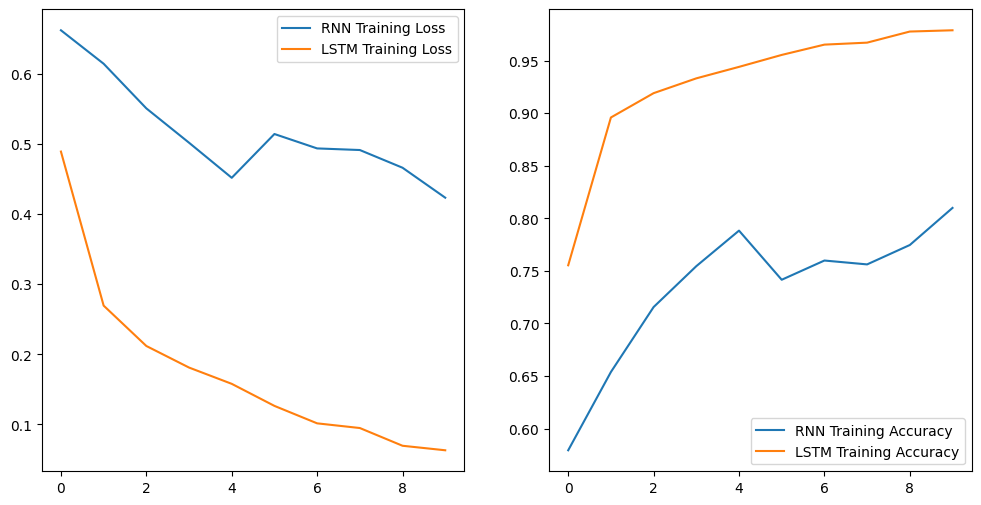

In [ ]:
#Loss Comparisions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_rnn.history['loss'],label='RNN Training Loss')
#plt.plot(history_rnn.history['val_loss'],label='RNN Validation Loss')
plt.plot(history_lstm.history['loss'],label='LSTM Training Loss')
#plt.plot(history_lstm.history['val_loss'],label='LSTM Validation Loss')
plt.legend()

#Accuracy Comparision
plt.subplot(1,2,2)
plt.plot(history_rnn.history['accuracy'],label='RNN Training Accuracy')
#plt.plot(history_rnn.history['val_accuracy'],label='RNN Validation Accuracy')
plt.plot(history_lstm.history['accuracy'],label='LSTM Training Accuracy')
#plt.plot(history_lstm.history['val_accuracy'],label='LSTM Validation Accuracy')

plt.legend()
plt.show()